In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Reading data and preprocessing

In [4]:
data = pd.read_csv('spam.csv',sep=',', usecols=[0,1], header = 0, names=['label', 'sms_message'], encoding='latin1')

data.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data['label'] = data.label.map({'ham':'0', 'spam':'1'})
data['label'] = data['label'].astype(int)

data.head()

,label,sms_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


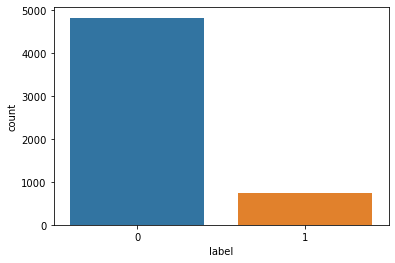

In [6]:
pl = sns.countplot(x="label", data=data)

## Splitting into training/test data and feature extraction

In [7]:
X = data['sms_message']
y = data['label']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
vec = CountVectorizer(stop_words='english')

In [12]:
vec.fit(X_train)

CountVectorizer(stop_words='english')

In [13]:
print(len(vec.get_feature_names()))

7485


In [14]:
X_train_transform = vec.transform(X_train)
X_test_transform = vec.transform(X_test)

## Classification using Bernoulli Naive Bayes

In [15]:
from sklearn.naive_bayes import BernoulliNB

In [16]:
clf = BernoulliNB()
clf.fit(X_train_transform, y_train)
pred = clf.predict(X_test_transform)

## Results

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#### Confusion matrix

<AxesSubplot:>

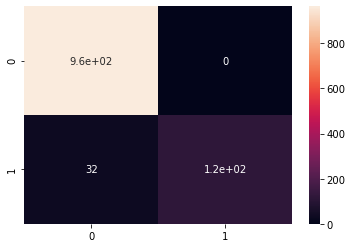

In [18]:
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix, annot=True)

#### Accuracy, precision, recall and f1

In [19]:
print('Accuracy score: {}'.format(accuracy_score(y_test, pred)))
print('Precision score: {}'.format(precision_score(y_test, pred)))
print('Recall score: {}'.format(recall_score(y_test, pred)))
print('F1 score: {}'.format(f1_score(y_test, pred)))

Accuracy score: 0.9713004484304932
Precision score: 1.0
Recall score: 0.7880794701986755
F1 score: 0.8814814814814815


## Classify your own messages

In [47]:
str = input('Write your SMS message ')

Write your SMS message logo stationery design please visit our site http : / / logo - design . by . ru / corporate identity , business cards , letterheads , envelops , flyers , brochures design our professional graphic design studio offers a wide range of graphic design services for highly competitive prices john miller , sales manager


In [48]:
str_transform = vec.transform([str])

In [49]:
if clf.predict(str_transform) == [0]:
    print("I think it's not a spam.")
else:
    print("I think it's a spam.")

I think it's a spam.
